# Car_Price_prediction Taks Number 3

# Name : Pandhare Rushikesh Sudhakar

# Car_Price_prediction 

### Problem Statement:

### Attributes Information:
- **Car_Name**: Give the information of car Name.
- **Year**: Give the information about 
- **Selling_Price**:Give the information about 
- **Present_Price**:Give the information about 
- **Kms_Driven**:Give the information about 
- **Fuel_Type**:Give the information about which type of fuel is use Petrol ,Diesel, CNG.
- **Seller_Type**: Give the information about seller_type Dealer or Individual.
- **Transmission**:Give the information about Transmission system whether is Manual or Automatic.
- **Owner**:Give the information about Owner 0, 1, 0r 3.

### Workflow:
1. Import all libraries
2. Load dataset
3. Check missing and null  values
4. Data Exploration
5. Perform data visualization
6. Model fitting
7. Feature extraction
8. Prediction
9. Deploy the model
10. Conclusion

### 1.Import all libraries


In [1]:
#installing modules
#!pip install pandas
# pip install seaborn

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np          # for numerical python
import pandas as pd           #for manupulation data
import seaborn as sns         # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor  # for feature importance
import pickle

### 2.Load Data

In [5]:
car = pd.read_csv("C:\\Users\\Rushkesh\\OneDrive\\Desktop\\Oasis\\car data.csv")

In [6]:
car.head() # load data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Shape of Data

In [7]:
car.shape # to shows no. of rows and feature

(301, 9)

- There are 301 rows and 9 features in this dataset

In [8]:
# checking unique values in each columns

print(car['Seller_Type'].unique())
print(car['Transmission'].unique())
print(car['Owner'].unique())
print(car['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


#### Looking for summary

In [9]:
# number of columns we have
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
 car.info()         # for shows information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### 3.Check missing and null values

In [11]:
car.isnull().sum() # for count the number of missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### Here no null values present in our data

In [12]:
car.describe() # statistical features

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### 4.Data Exploration

In [13]:
#Create new dataframe with skipe car-name
car_dataset = car[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### create new feature to know how many years is car old
### Add Current_year = '2023' column

In [14]:
car_dataset['Current_year']=2023

In [15]:
car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


#### Add new column Number of year column = Current_year - Year

In [16]:
car_dataset['No.of_year'] = car_dataset['Current_year'] - car_dataset['Year']
car_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No.of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


#### Delete 'Year' column: no neet this featurs

In [17]:
car_dataset.drop(['Year'],axis=1,inplace=True) 
car_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No.of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


#### Delete 'Current_Year' column also.

In [18]:
car_dataset.drop(['Current_year'],axis=1,inplace=True) 
car_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No.of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


#### convert categorical data into dummy indicator variable
**pd.get_dummies**:is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [19]:
car_dataset=pd.get_dummies(car_dataset,drop_first=True)
car_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


### 5.Perform data visualization 

#### Corretation between features

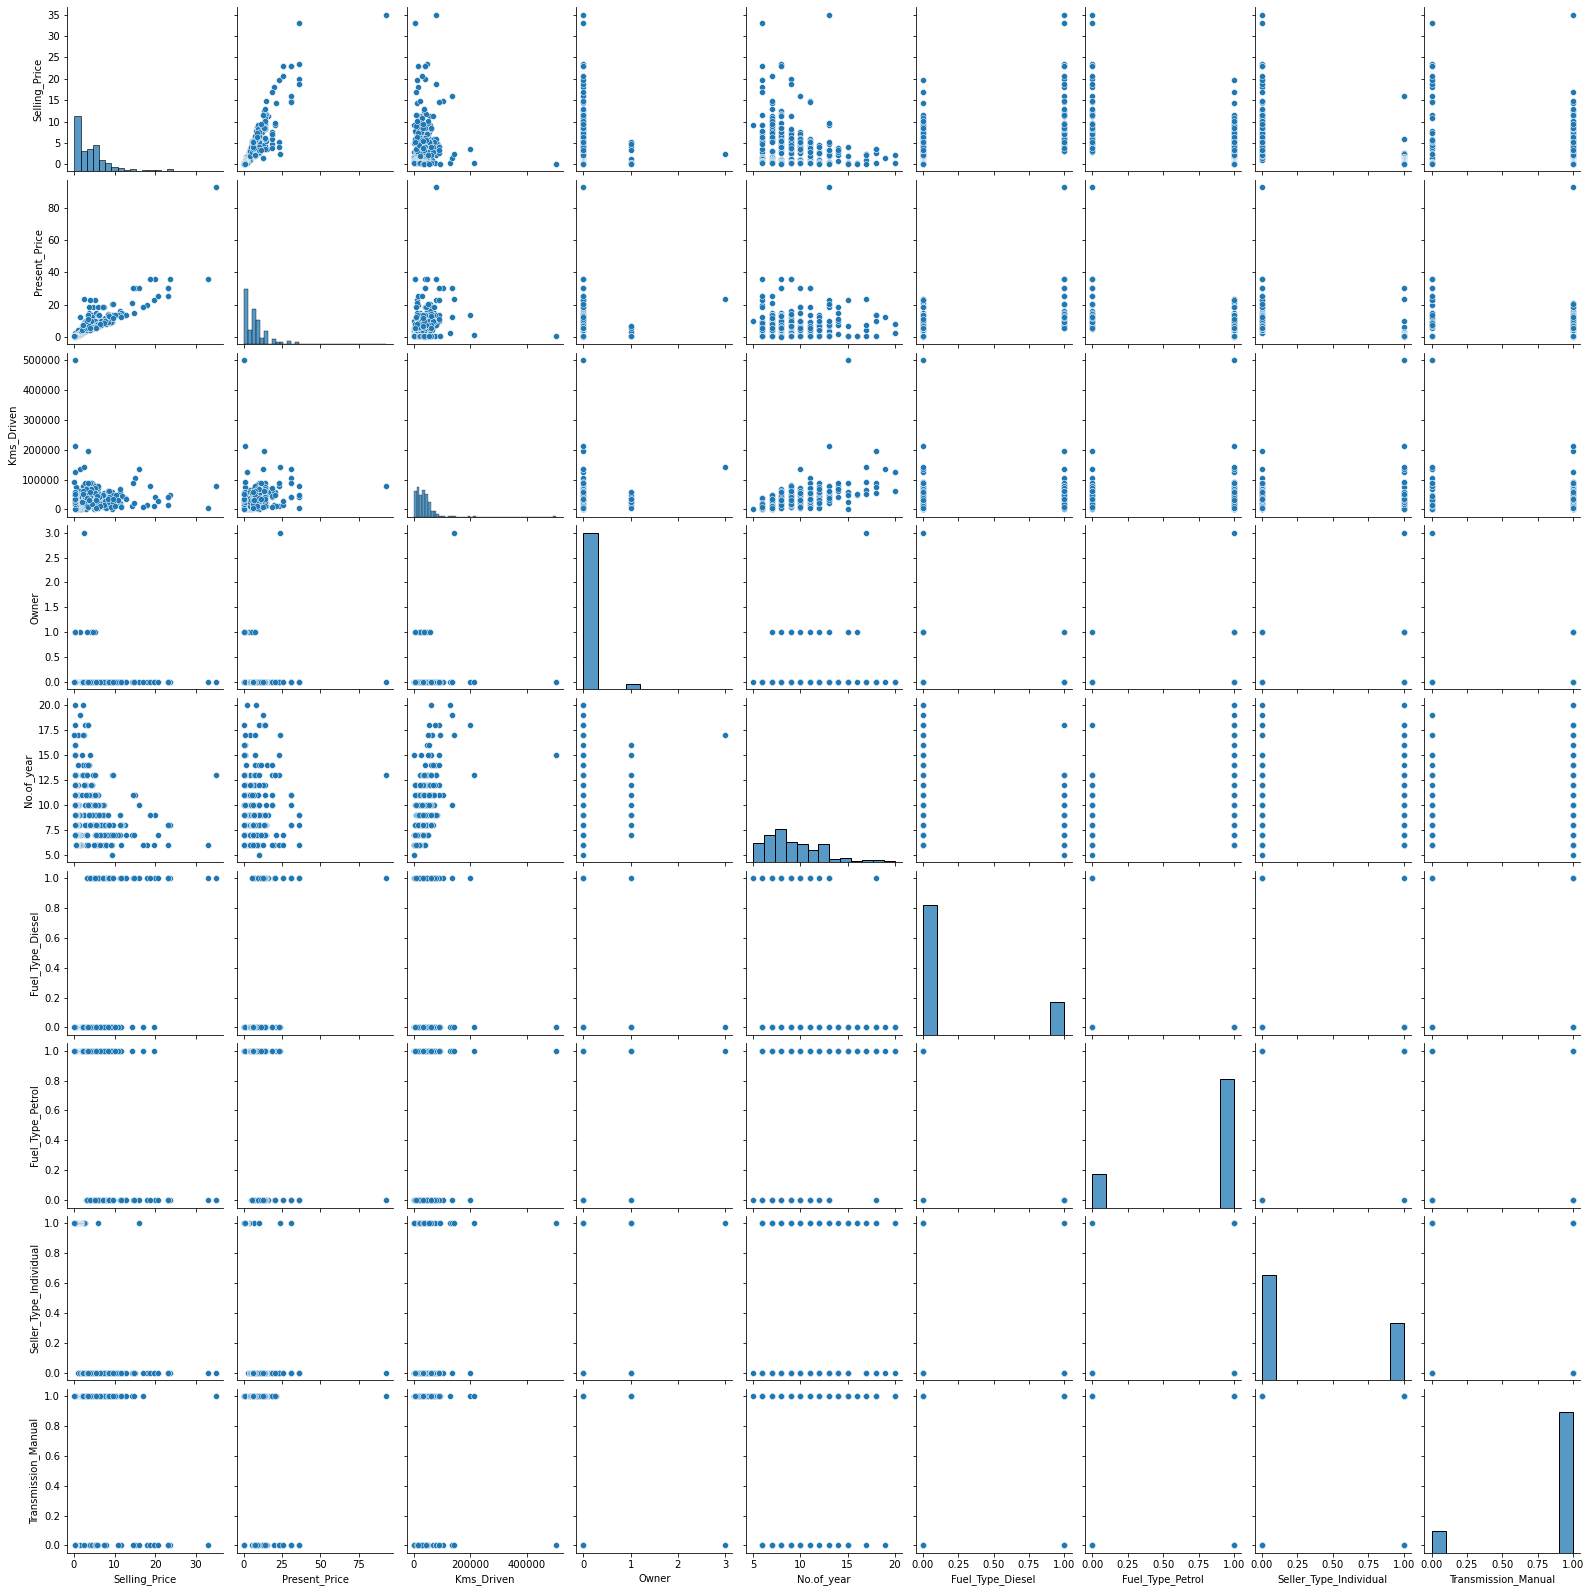

In [20]:
#draw pairplot= Seaborn Pairplot uses to get the relation between each and every variable present in Pandas DataFrame

sns.pairplot(car_dataset)

In [21]:
corr = car_dataset.corr()
corr

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No.of_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


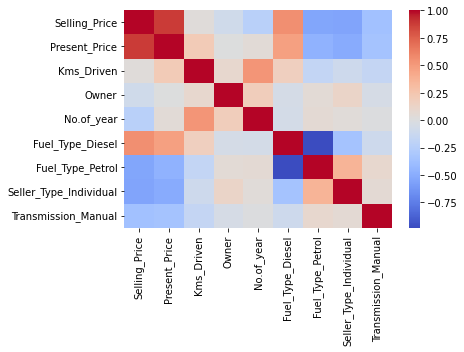

In [22]:
# Using heatmap for correlation
sns.heatmap(corr,cmap="coolwarm") #coolwarm=warm color in colormap
plt.show()

<AxesSubplot:>

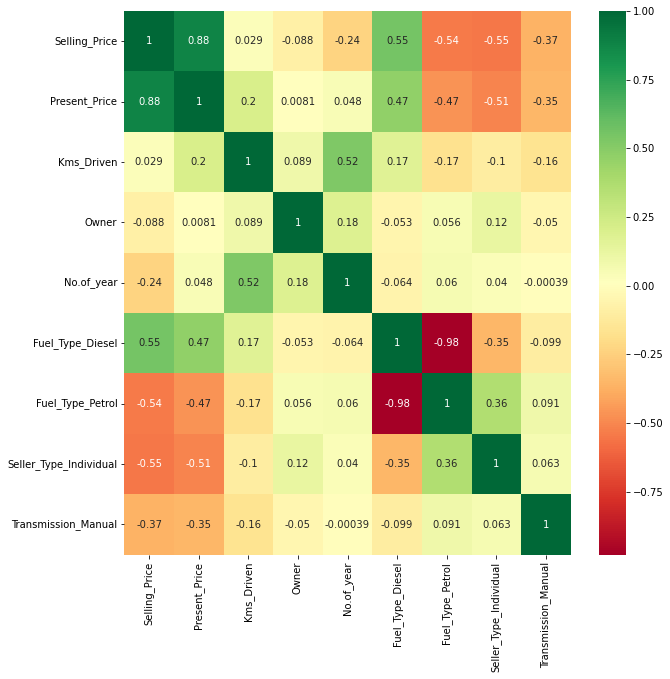

In [23]:
#plot heatmap for top_corelation features

top_corr_features = corr.index
plt.figure(figsize=(10,10))

sns.heatmap(car_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Obervation**:
- Dark green color shows positively correlated ,so selling price is directly correlated with transmittion system.
- Red color shows negative corelation between fuels.

### 6.Model fitting

In [24]:
car_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No.of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [25]:
# Independent and dependent features:
#selling price is dependent feature & all are independent features.
X = car_dataset.iloc[:,1:]

y = car_dataset.iloc[:,0]

In [26]:
X.head()

,Present_Price,Kms_Driven,Owner,No.of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [27]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [28]:
# feature Importance

# from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [29]:
print(model.feature_importances_)

[0.40774127 0.03733814 0.00066527 0.08309441 0.20287888 0.01329664
 0.1308436  0.12414177]


### Plot graph of feature importances for better visualization


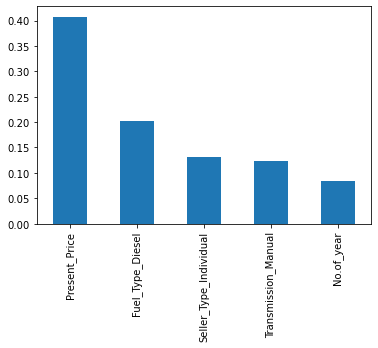

In [30]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='bar')
plt.show()

**Oberservation**: Present price is so high.

### 7.Feature extraction

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
X_train.shape

(240, 8)

### Implement random forest regressor

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.


In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_Random = RandomForestRegressor()

### Hyperparameters:
The hyperparameters are different parameter values that are used to control the learning process and have a significant effect on the performance of machine learning models.

**Hyperparameter optimization** is the process of finding the right combination of hyperparameter values to achieve maximum performance on the data in a reasonable amount of time.

In [34]:
n_estimators=[int(x) for x in np.linspace(start = 100,stop=1200,num=12)] # Desision trees 100-1200
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


### Randomized Search cv:
- Randomized Search which is used to find the most optimal combination of hyper parameters for coming up with the best model.
- faster than grid search

In [35]:
# No. of trees in random forest
n_estimators=[int(x) for x in np.linspace(start = 100, stop=1200, num=12)]

# no. of features to consider at every split
max_features=['auto','sqrt']

#Max no of level in trees
max_depth=[int(x) for x in np.linspace(5,30, num=6)]

# maxDepth.appends(None)
# minimum no of samples req to split a node

min_samples_split=[2,5,10,100]

# minimum no of samples req at each leaf node
min_samples_leaf = [1,2,5,10]

In [36]:
### from sklearn.model_selection import RandomizedSearchCV
### Create the random grid

from sklearn.model_selection import RandomizedSearchCV

In [37]:
random_grid = {'n_estimators':n_estimators,
                "max_features":max_features,
                "max_depth":max_depth,
                "min_samples_split":min_samples_split,
                'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 100], 'min_samples_leaf': [1, 2, 5, 10]}


### Use the random grid to search for best hyperparameters
### First create the base model to tune
- Using crossvalidation

In [38]:
rf = RandomForestRegressor()

In [39]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions =random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [40]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   0.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   0.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=100

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [42]:
rf_random.best_score_

-4.0577066167598606

### 8.Prediction

In [43]:
predictions=rf_random.predict(X_test)

In [44]:
predictions

array([ 3.06697084,  1.41344615,  3.17066551,  6.46483352,  0.67087746,
       22.86167869,  0.73708514,  2.69895508,  5.77503504,  0.47033204,
        0.86593846,  4.00043116,  4.1522502 ,  3.03679879,  2.82492596,
        4.64264584,  5.75398367,  5.04102173,  2.9147224 ,  6.72328216,
        5.40812852,  7.34956458,  5.57224172,  2.64407475,  0.57228584,
        4.52430742,  7.74113468,  3.16478203,  0.47283342,  4.29344235,
        0.34488724,  1.34875692, 11.61983858,  4.36838529,  0.22856623,
        0.49332463,  7.7669608 ,  0.44284091,  1.15649857,  0.45486444,
        0.55683674,  6.84317952,  4.96902168, 14.763069  ,  5.52388725,
       23.019905  ,  4.06240746,  3.70440347,  0.3145711 ,  6.35342417,
        7.97677511,  8.98357743,  8.10701384,  5.2609077 ,  3.07995793,
        0.25839024,  0.43249356,  4.54960767,  3.00475038,  0.23172817,
       22.14732408])

C:\Users\Rushkesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

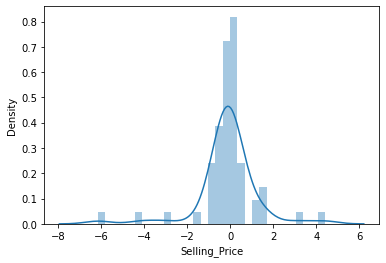

In [45]:
#using distplot for 
sns.distplot(y_test-predictions)

**Observation**: We get normal distribution,its mean our model gives us very good results.

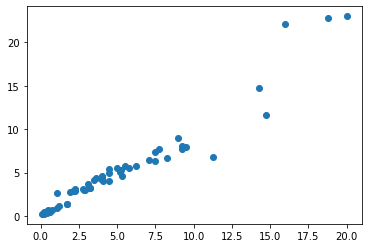

In [46]:
plt.scatter(y_test,predictions)

**obeservation**:  ploting is linearly availabel thats means our prediction is prety much good.
     

In [47]:
## Picke this file 

**Pickle** 
- It can be a machine learning algorithms or object.
- It is the standard way of serializing objects in Python for deployment.
- The pickle operation to serialize your machine learning algorithms and save the serialized format to a file.
- Later you can load this file to deserialize your model and use it to make new predictions.

In [48]:
import pickle

In [49]:
#open the file,where you are to store the data
file = open('random_forest_regression_model.pkl','wb')

In [50]:
# dump information to that file
pickle.dump(rf_random, file)

### Creating requirement.txt file 
- Python requirements files are a great way to keep track of the Python modules. It is a simple text file that saves a list of the modules and packages required by your project.


In [51]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install -r requirements.txt


Processing c:\home\ktietz\src\ci\alabaster_1611921544520\work
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\home\\ktietz\\src\\ci\\alabaster_1611921544520\\work'



* Model file is created successfully.

### Thank you!
## Continue Exploring.......!!
